# Performing Exploratory Data Analysis for Student Retention

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from tools.utils import combine_columns, compute_feature_importance, standard_units

## Introduction

The purpose of this project is to analyze the factors that influence the retention rate of a school and how closely they relate to retention rate. Retention rate is a critical indicator of a school's effectiveness and success in keeping students enrolled and engaged in their academic pursuits. In this project, we will examine various factors that could potentially impact retention rates, such as the control of the school(public, non-profit private and profit private), in-state/out-state tuition & fee, the percentage of individuals receiving federal loans, race, parent education and so on.

## Data Description

The data used in this analysis will be obtained from the College Scorecard, a comprehensive dataset maintained by the United States Department of Education. The dataset includes information on over 7,000 higher education institutions in the United States, spanning a period of more than two decades.

The dataset includes a range of variables, including institutional characteristics such as size, location, and type of degree programs offered, as well as information on student outcomes such as graduation rates, earnings, and debt levels. In addition, the dataset includes information on institutional net price, which is the average cost of attendance after accounting for grants and scholarships.

Overall, the data provides a comprehensive view of the factors that impact retention rates in higher education institutions and will be used to inform strategies for improving retention rates and student success.

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

Since we are focusing on retention rates, we are renaming the variable names for the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions" in order to improve identification of the main variables.

In [3]:
# First-time, full-time student retention rate at four-year institutions
four_yr_retention = data.RET_FT4

# First-time, full-time student retention rate at less-than-four-year institutions
less_four_yr_retention = data.RET_FTL4

## Important Note: __Null Values__

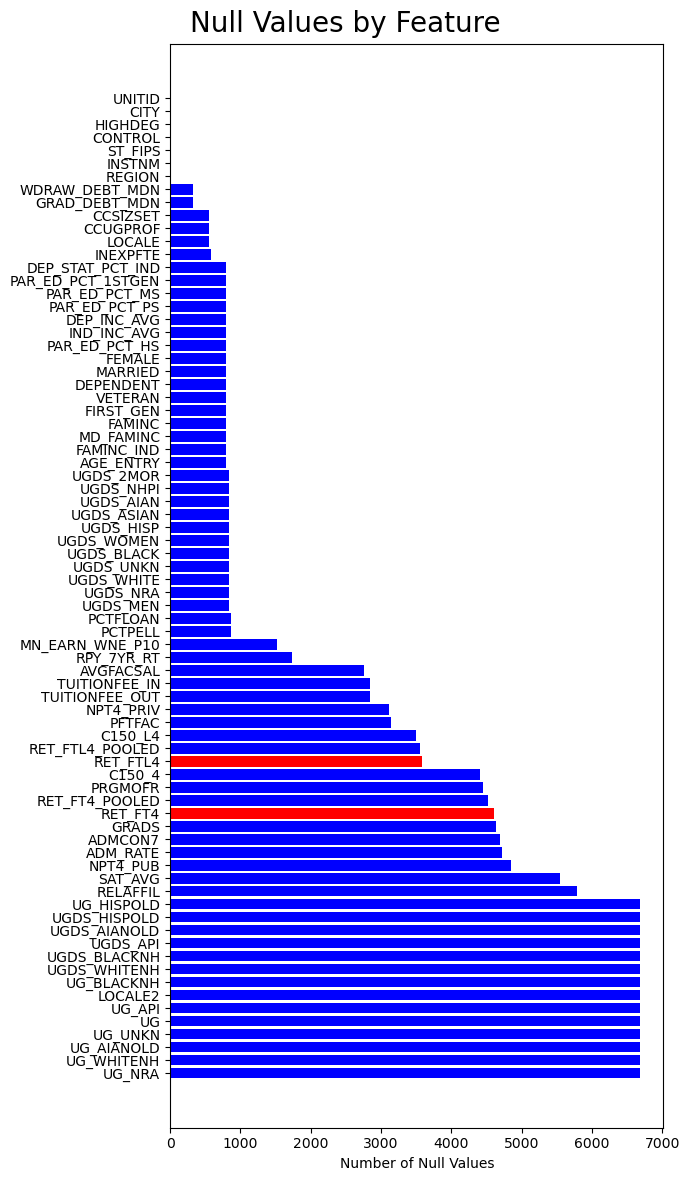

In [4]:
nulls_by_column = data.isna().sum().sort_values(ascending=False)

colors = np.tile('b', len(nulls_by_column))

retention = ["RET_FT4", "RET_FTL4"]
retention_vars_mask = pd.Series(nulls_by_column.index).isin(retention).values
colors[retention_vars_mask] = np.tile('r', len(retention))

fig, ax = plt.subplots(figsize=(7, 12))
ax.barh(np.arange(-5, len(nulls_by_column)-5), nulls_by_column.values, color=colors)
ax.set_yticks(np.arange(-5, len(nulls_by_column)-5), labels=nulls_by_column.index)
ax.set_xlabel("Number of Null Values")
fig.suptitle("Null Values by Feature", size=20)
fig.savefig('figures/null_values.png')
fig.tight_layout();

It is important to note that we will be dealing with a high amount of null values, especially when looking at the number of programs. In fact, the last several columns listed are entirely null.

## Histograms for Overall Retention Rates

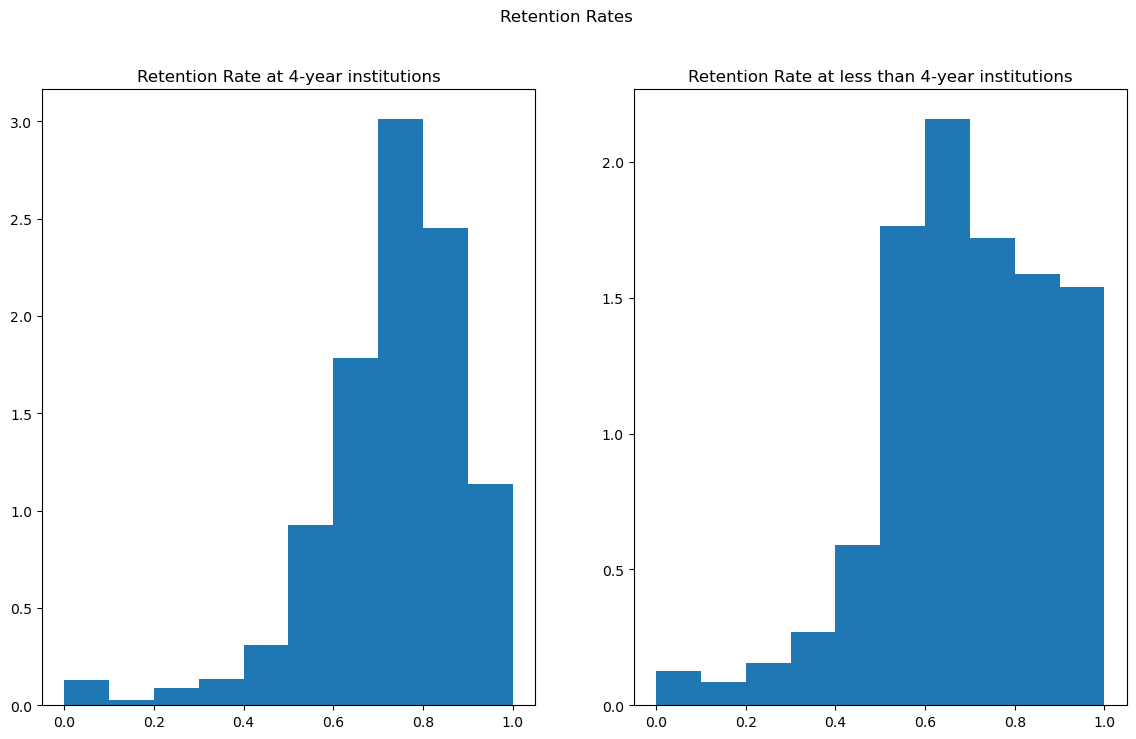

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(four_yr_retention, density = True)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(less_four_yr_retention, density = True)

plt.savefig('figures/overall_retention_histogram.png')
plt.show()

Based on the histograms, we notice that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

We will now explore sets of relevant variables and their relation to the retention rates.